###  раннее в гугл-коллабе была произведена векторизация с DeepPavlov (и небольшой рисёрч в файле Задание_6_рисерч)

In [125]:
import os

vector_files = sorted([f for f in os.listdir('vector_chunks1')])

all_vectors = []
for vf in vector_files:
    vectors = np.load(os.path.join('vector_chunks1', vf))
    all_vectors.append(vectors)

all_vectors = np.vstack(all_vectors)

print("Объединенный массив векторов имеет форму:", all_vectors.shape)

Объединенный массив векторов имеет форму: (4405, 768)


In [126]:
np.save('VectorDatabase.npy',all_vectors)

In [36]:
filepath = 'books/hs.docx'
doc = docx.Document(filepath)
"""for num,para in enumerate(doc.paragraphs[:14]):
    if len(para.text.strip().split()) >= 4:
        print('#',num,para.text.strip())"""
paragraphs = [p.text.strip() for p in doc.paragraphs]

# 8 В книге собраны рекомендации по профилактике и лечению наиболее распространенных инфекционных, инвазионных, грибковых, гельминтовых, а также незаразных болезней сельскохозяйственных животных, пчел и птиц, домашних животных: собак, кошек, певчих и декоративных птиц, аквариумных рыбок и т. д.
# 9 Рассматриваются вопросы ветеринарной санитарии и зоогигиены, приводятся рекомендации по организации правильного питания животных и их содержанию. Рассмотрены вопросы по организации ветеринарного бизнеса, маркетинга, менеджмента, а также вопросы планирования и определения экономической эффективности ветеринарных предприятий.
# 10 Для ветеринарных специалистов и широкого круга читателей.


### Об источниках 

Было собран 5 книг в виде docx файлов. Удалены оглавление, список источников, ненужные символы и тп. Далее были выбрали абзацы, где содержится больше 80 "слов" (цифры и проблелы могут попадаться тоэе), чтобы чанки содержали качественную информацию.

In [85]:
from docx import Document
import numpy as np
import pandas as pd
import string
import re

def get_paragraphs_from_docx(filename,cut_range):
    doc = Document(filename)
    paragraphs = [
        p.text.strip() 
        for p in doc.paragraphs[cut_range[0]:cut_range[1]] 
        if len(p.text.strip().split()) >= 80
    ]
    
    return paragraphs

In [86]:
cut_list = [(49,-375),(16,-67),(94,-100),(14,-1),(1082,-152)] # топорно, но убираем страницы с оглавлением и источниками

filepath_list = ['books/1.docx','books/2.docx','books/3.docx','books/4.docx','books/5.docx']
Data = sum([get_paragraphs_from_docx(filepath,cut_range) for cut_range,filepath in zip(cut_list,filepath_list)],[])
print(len(Data))

4405


In [87]:
# предобработка

import re

def clean_data(data):
    cleaned_data = []
    for line in data:
        cleaned_line = line.replace('\xa0', ' ')  
        cleaned_line = re.sub(r'[^\w\s.,;:!?"\'-]', '', cleaned_line)  
        cleaned_line = re.sub(r'\s+', ' ', cleaned_line).strip()  
        cleaned_data.append(cleaned_line)
    return cleaned_data

In [92]:
CleanedData = clean_data(Data)

In [93]:
CleanedData[1000]

'ишемия от греч. ischō задерживаю, останавливаю и háima кровь, местная анемия, недостаточное кровенаполнение какого-либо участка организма, органа или ткани вследствие ослабления или прекращения притока артериальной крови; Компрессионная И. возникает в результате сдавливания приводящей артерии наложением жгута, опухолью, рубцом, инородным телом. Обтурационная И. вызывается внутрисосудистыми факторами закупорка артерии эмболом, тромбом, закрытие просвета сосуда вследствие облитерации его стенки. Ангиоспастическая И. возникает в результате рефлекторного спазма сосудов под влиянием эмоциональных аффектов, механических, физических, химических и биологических факторов. При И. наблюдают бледность ишемического участка, понижение его температуры. В нём нарушается обмен веществ, возникает гипоксия, приводящая к некрозу ткани. Острая И. обычно заканчивается восстановлением функции ткани. Однако И. миокарда см. Инфаркт или мозга может вызвать тяжёлое расстройство их функции, иногда смерть. Хронич

In [94]:
len(Data)

4405

In [95]:
DataSeries = pd.Series(Data)
DataSeries

0       А, список А, группа ядовитых высоко токсичных ...
1       А. овец производят под сочетанным наркозом. Бр...
2       А. крупного рогатого скота. Животное фиксируют...
3       Симптоматические А. инфекционные, инвазионные ...
4       Течение и симптомы. Различают: полный А. — изг...
                              ...                        
4400    За 5-6 дней до окрола клетки и гнездовое отдел...
4401    На кролиководческих фермах применяется наружно...
4402    Племенная работа основана на тщательном отборе...
4403    Нутрия. Родина нутрии – Южная Америка, местооб...
4404    В рационе плотоядных зверей основными кормами ...
Length: 4405, dtype: object

### Сохраняем, чтобы потом в гугл каллаб загрузить (to be continued)

In [96]:
DataSeries.to_csv('books/Data.csv', index=False)

In [97]:
df = pd.read_csv('books/Data.csv')['0']

In [98]:
df

0       А, список А, группа ядовитых высоко токсичных ...
1       А. овец производят под сочетанным наркозом. Бр...
2       А. крупного рогатого скота. Животное фиксируют...
3       Симптоматические А. инфекционные, инвазионные ...
4       Течение и симптомы. Различают: полный А. — изг...
                              ...                        
4400    За 5-6 дней до окрола клетки и гнездовое отдел...
4401    На кролиководческих фермах применяется наружно...
4402    Племенная работа основана на тщательном отборе...
4403    Нутрия. Родина нутрии – Южная Америка, местооб...
4404    В рационе плотоядных зверей основными кормами ...
Name: 0, Length: 4405, dtype: object

In [67]:
len(Data)

8724

In [7]:
for num,i in enumerate(Data[:20]):
    print('#',num,i)

# 0 А, список А, группа ядовитых высоко токсичных лекарственных средств, предусматриваемая Государственной фармакопеей СССР; дополняется и изменяется приказами Министерства здравоохранения СССР. При обращении с этими лекарственными средствами необходимо соблюдать особую осторожность. Медикаменты списка хранятся в аптеках под замком в отдельных шкафах с надписью «А — venena» (ядовитые). Перед закрытием аптеки шкафы опечатывают и пломбируют. Для ветеринарных целей ядовитые лекарства отпускаются непосредственно ветеринарному врачу, ветеринарному фельдшеру или другим лицам по их доверенности с отметкой на этикетке или сигнатуре «Для ветеринарных целей». Ветеринарный врач или фельдшер несут полную ответственность за использование ядовитых лекарственных средств по прямому назначению. См. также Б.
# 1 +++
# 2 абдукторы (от лат. abduco — отвожу, отклоняю), мышцы, отводящие какую-либо часть тела (в основном конечности) от его срединной плоскости. Ср. Аддукторы.
# 3 +++
# 4 абиотические факторы 

In [9]:
count_of_words_in_paragraph = [len(i.split()) for i in Data]
print(np.mean(count_of_words_in_paragraph),np.std(count_of_words_in_paragraph))

38.576924223010224 47.64595770555461


In [11]:
series_data =  pd.Series(Data)
series_count_of_words_in_paragraph = pd.Series(count_of_words_in_paragraph)
series_count_of_words_in_paragraph

0        97
1         1
2        21
3         1
4        52
         ..
33554     2
33555    25
33556    47
33557    65
33558    32
Length: 33559, dtype: int64

In [12]:
series_data[3167]

'детергенты (от лат. detergeo\xa0— очищаю), синтетические вещества, обладающие высокой поверхностной активностью и в связи с этим моющим, дезинфицирующим и растворяющим действием. Молекулы Д. представляют собой длинные углеводородные цепи (от 8 до 20\xa0атомов углерода), на одном конце которых находятся диссоциирующие ионогенные или полярные группы. Поэтому Д. делят на анионные, катионные и неионогенные. Имеются и амфолитные Д., которые содержат одновременно карбоксильную (сульфоэфирную) группу и аминогруппу. Д. применяют при приготовлении различных дезинфицирующих средств, фармацевтических и фунгицидных препаратов, как моющие и моюще-дезинфицирующие средства, в практике биохимических (например, при очистке ферментов) и вирусологических (при очистке и концентрировании вирусов) лабораторий. На молочных фермах из Д. используют сульфанол, порошки А, Б, В, содержащие сульфанол, метилсиликат натрия и\xa0др., дезмол и\xa0др. Д.; на предприятиях молочной промышленности\xa0— «Триас-А», «Вимол»

In [110]:
X = np.arange(1,100)

In [111]:
Y = [len(series_data[series_count_of_words_in_paragraph>i]) for i in X]

In [112]:
np.gradient(Y,X)

array([-976. , -848. , -722. , -758.5, -693. , -553. , -501.5, -481.5,
       -450. , -437. , -434.5, -438.5, -469.5, -476. , -458.5, -424.5,
       -430. , -466. , -464. , -442.5, -455.5, -466. , -438. , -414.5,
       -389. , -378. , -378. , -375.5, -387.5, -400. , -378.5, -362.5,
       -343. , -336.5, -349.5, -334.5, -315. , -308. , -297.5, -281.5,
       -287.5, -274. , -254. , -261. , -262.5, -249.5, -243.5, -236.5,
       -215.5, -222.5, -228. , -200.5, -184.5, -177. , -191.5, -199.5,
       -172.5, -158. , -154. , -150. , -153.5, -156.5, -146. , -138.5,
       -146. , -136.5, -122. , -114. , -109.5, -119.5, -108.5, -100. ,
       -105. , -100.5,  -98. ,  -93.5,  -91.5,  -93. ,  -92. ,  -93.5,
        -97.5,  -96.5,  -87. ,  -83.5,  -85. ,  -75. ,  -75. ,  -75.5,
        -66. ,  -74.5,  -88. ,  -75. ,  -60. ,  -62.5,  -63.5,  -71. ,
        -68.5,  -53. ,  -49. ])

### производная стабилизируется после значений 30-40. Это может свидетельствовует о том, что данные состоящие меньше, чем из 30-40 слов содержат много выбросов. Но для 40 набор данных слишком большой, поэтому я выбрала значение 80.

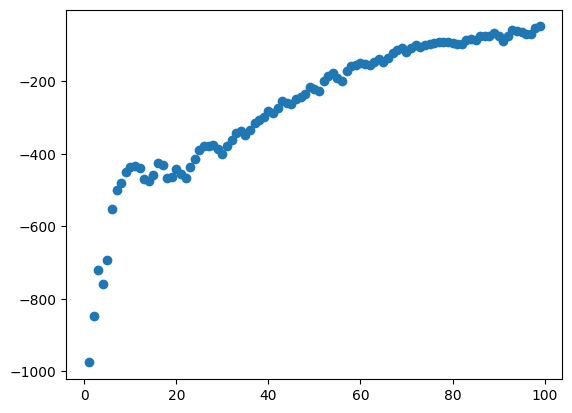

In [113]:
plt.plot(X,np.gradient(Y,X),'o')

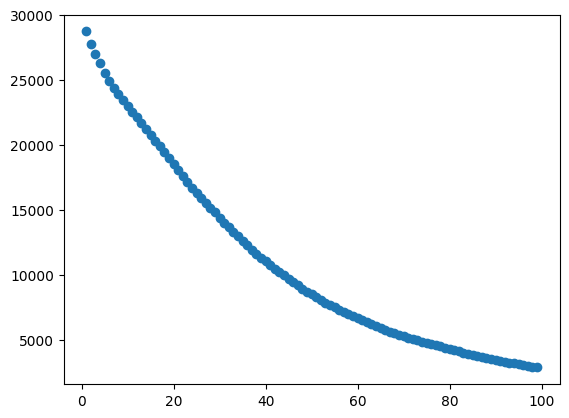

In [103]:
plt.plot(X,Y,'o')

In [16]:
np.max(count_of_words_in_paragraph)

544

(0.0, 1200.0)

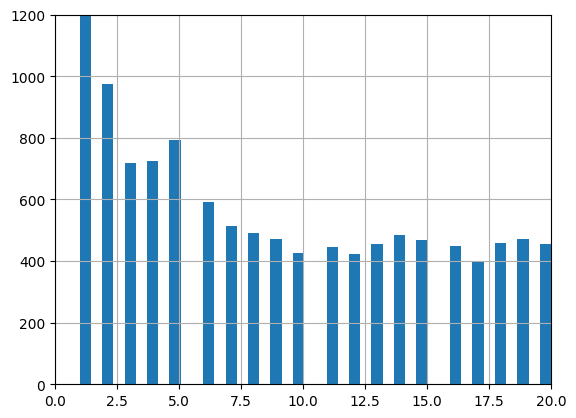

In [123]:
import matplotlib.pyplot as plt
series_count_of_words_in_paragraph.hist(bins=1200)
plt.xlim(0,20)
plt.ylim(0,1200)

(0.0, 500.0)

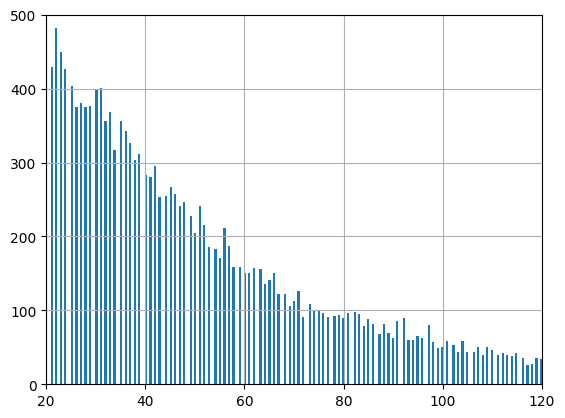

In [121]:
import matplotlib.pyplot as plt
series_count_of_words_in_paragraph.hist(bins=1200)
plt.xlim(20,120)
plt.ylim(0,500)

In [45]:
for num,i in enumerate(data[:10]):
    print('#',num,i)

# 0 Александр Александрович Ханников
# 1 Справочник ветеринарного специалиста
# 2 Аннотация
# 3 В книге собраны рекомендации по профилактике и лечению наиболее распространенных инфекционных, инвазионных, грибковых, гельминтовых, а также незаразных болезней сельскохозяйственных животных, пчел и птиц, домашних животных: собак, кошек, певчих и декоративных птиц, аквариумных рыбок и т. д.
# 4 Рассматриваются вопросы ветеринарной санитарии и зоогигиены, приводятся рекомендации по организации правильного питания животных и их содержанию. Рассмотрены вопросы по организации ветеринарного бизнеса, маркетинга, менеджмента, а также вопросы планирования и определения экономической эффективности ветеринарных предприятий.
# 5 Для ветеринарных специалистов и широкого круга читателей.
# 6 Александр Александрович Ханников
# 7 Справочник ветеринарного специалиста
# 8 Введение
# 9 В книге рассмотрены причины возникновения, механизмы развития, клинико-морфологические проявления, принципы лечения и профила

In [7]:
import os

docpath = 'books' 

files = [f for f in os.listdir(docpath) if os.path.isfile(os.path.join(docpath, f))]

for file in files:
    print(file)

ev.doc
hs.docx


### Работа с моделью и агентами

In [138]:
from langchain_community.llms import Ollama

mn_model = Ollama(base_url='http://localhost:11434', model="mistral-nemo")

In [139]:
import pandas as pd
dfprompt = pd.read_csv('prompt_to_mn.csv')['0']

In [141]:
import time

In [142]:
# агент номер один
responce_list = []
for num,prompt in enumerate(dfprompt.values):
    st = time.time()
    responce = mn_model.invoke(prompt)
    responce_list.append(responce)
    et = time.time()
    print("#",num,et-st,responce)

# 0 28.07770299911499 У кошки наблюдается воспаление уха, сопровождающееся сильным зудом и покраснением слухового прохода. Животное часто наклоняет голову набок и трет ухо лапой. При осмотре ветеринар обнаруживает гнойные выделения из ушного канала. Кошка реагирует на прикосновение к больному уху, хлопает им и отдергивается. Кроме того, отмечается неприятный запах из уха животного.
# 1 84.49609422683716 Пациент: собака, полтора года. Врач обнаружил у животного воспаление уха, отмеченное покраснение барабанной перепонки и гнойные выделения из ушного канала. Лабораторный анализ показал присутствие сероводорода в образце ушной слизи, что свидетельствует о наличии инфекции. Животное проявляет признаки боли при пальпации уха и теряет аппетит.
# 2 89.32560324668884 У кошки воспаление уха. Беспрестанно трет лапой за ухом и встряхивает головой. Из уха заметен гнойный выделениями, неприятный запах. При пальпации область вокруг уха болезненна. Поведение животного стало агрессивным из-за причиняе

# 28 96.49071168899536 Молодая овца отказывается от еды, у нее рвота и диарея водянистого характера. Животное вялое, температура тела повышена. При пальпации живота животное проявляет болевые реакции. Врач ветеринарной клиники ставит предварительный диагноз гастроэнтерит.
# 29 105.80723214149475 Клиническая картина: У коровы внезапно начались частые, жидкие дефекации, содержимое кала имел желтый цвет и зловонный запах. Животное стало вялым, отказывалось от еды, дыхание было затруднено, слышалось хрипение. Кожа вокруг глаз и носа приобрела синюшный оттенок. При осмотре ротовой полости замечены следы слизи и пены. Температура тела повысилась до 40,5°C. С течением времени корова стала лежать большую часть времени, не проявляя интереса к окружающему миру.
# 30 121.01026964187622 У собаки плохой запах изо рта, она неохотно ест и теряет вес. При осмотре выявляется зубной камень на зубах и воспаление десен (гингивит). Нарушенные ткани кровоточат даже при легком давлении.
# 31 144.696704864501

# 54 94.29414510726929 У коровы внезапно повысилась температура, появились затрудненное мочеиспускание с кровью в конце акта, постоянные позывы в туалет. Животное отказывается от еды и воды, становится вялой и апатичной.
# 55 82.6321382522583 Кот стал часто посещать лоток, испытывает боль при мочеиспускании, моча мутная и имеет неприятный запах. В некоторых случаях в моче присутствуют кровяные примеси. Животное проявляет беспокойство и раздражительность.
# 56 86.34273171424866 Кошка отказывается от еды уже несколько дней. Сегодня она начала странно себя вести - ходит кругами и пугается своего отражения в зеркале. Температура тела повышена до 41°C, дыхание учащено. Внезапно у животного начались судороги с оскалом и скрежетом зубов. На коже живота появились небольшие розовые пятна. Через несколько часов кошка впала в кому, из пасти течет пенистая жидкость.
# 57 102.93716597557068 Кошка начала чаще посещать лоток, но мочится малыми порциями. Во время мочеиспускания проявляет признаки боли

# 78 120.52913784980774 Лапки у свиньи грязные, пахнет гнилью. Живот увеличен, опущен. Гуляет температура тела 40-42°C. Аппетит снижен или отсутствует совсем. Влагалище выделяет желтый гнойный секрет с неприятным запахом.
# 79 92.75224924087524 Клиническая картина: Свиноматка с вялостью, отсутствием аппетита, матовым оттенком кожного покрова. Пневмония прослушивается при аускультации, температура тела слегка повышена, наблюдается лейкоцитоз и лимфоцитоз в крови.
# 80 120.88591718673706 Овца начала часто чесаться и чихать после переезда на новую ферму. У нее появились покраснения на коже и она стала чаще тереться о предметы, пытаясь облегчить зуд. Ветврач диагностировал аллергическую реакцию, вероятно вызванную новым кормом или средой обитания. Овце назначили антигистаминные препараты и рекомендовали тщательно следить за гигиеной на ферме для профилактики подобных реакций в будущем.
# 81 88.84477496147156 Корова после приема пищи начала чесаться, появились сыпь и отеки на коже шеи и мор

In [143]:
# агент номер два
main_promt_a2 = 'Сейчас я отправлю тебе клиническую картинку больного животного. Ты должен выделить из нее основные симптомы.\nВот пример как должен выглядеть твой ответ:\"симптомы:боль в ухе,гнойные выделения из уха,зуд и дискомфорт\". Твой ответ должен строго следовать такому формату!\nКлиническая картина:'
responce_list_a2 = []
for responce_a1 in responce_list:
    responce_a2 = mn_model.invoke(main_promt_a2+responce_a1)
    responce_list_a2.append(responce_a2)

In [144]:
# собираем датасет
diesis = (['отит']*10+["Дерматит"]*10+["Гастроэнтерит"]*10+
 ["Зубной камень и гингивит"]*10+["Паразитарные инфекции"]*10+["Цистит"]*10+
 ["Артикулярные заболевания (артрит)"]*10+["Пиометра"]*10+["Аллергические реакции"]*10+["Панкреатит"]*10)
dffinal = pd.DataFrame({"диагноз":diesis,'клиническая картина':responce_list,'симптомы':responce_list_a2 })

In [146]:
dffinal

,диагноз,клиническая картина,симптомы
0,отит,"У кошки наблюдается воспаление уха, сопровожда...","Симптомы: воспаление уха, гнойные выделения из..."
1,отит,"Пациент: собака, полтора года. Врач обнаружил ...","Симптомы: боль в ухе, гнойные выделения из уха..."
2,отит,У кошки воспаление уха. Беспрестанно трет лапо...,"Симптомы: боль в ухе, гнойные выделения из уха..."
3,отит,У собаки отмечаются частые приступы слезотечен...,"Симптомы: слезотечение из глаз, светобоязнь, г..."
4,отит,У птицы из носа течет гной. Она трясет головой...,"Симптомы: гнойные выделения из носа, головная ..."
...,...,...,...
95,Панкреатит,Собака отказывается от еды и воды на протяжени...,"симптомы:отказ от еды и воды, рвота желчью пос..."
96,Панкреатит,"У кошки внезапно появились боли в животе, рвот...","Симптомы: боль в животе, рвота, диарея, отказ ..."
97,Панкреатит,"Собака, 5 лет, мужского пола, замечена в слабо...",Симптомы: рвота желчью после каждого приема пи...
98,Панкреатит,"У коровы наблюдается снижение аппетита, вялост...","Симптомы: снижение аппетита, вялость, тусклая ..."


In [147]:
dffinal.to_csv('MyDataset.csv', index=False)